In [171]:
from pymongo import MongoClient
import pandas as pd
from pandas.io.json import json_normalize
import pickle

In [326]:
import pandas as pd
import pandas
from itertools import chain
import numpy as np

from bson import json_util, ObjectId
from pandas.io.json import json_normalize
import json

import re
from datetime import datetime

import matplotlib.pyplot as plt

In [173]:
client = MongoClient()
client.list_database_names()

['admin', 'books', 'comedy_covid', 'config', 'local', 'outings', 'ted']

In [174]:
db = client.ted
db.list_collection_names()

['ted_stats', 'ted_transcripts', 'ted_comments']

In [296]:
cursor = db.ted_stats.find({}, {'_id':0, 'items':1})
#list(cursor)

In [297]:
#cursor = db.ted_comments.find({}, {'_id':0, 'items':1})

In [298]:
df =  pd.DataFrame(list(cursor))

In [299]:
df.shape

(2732, 1)

In [300]:
df.head()

,items
0,"[{'kind': 'youtube#video', 'etag': '8hFc92dcK-..."
1,"[{'kind': 'youtube#video', 'etag': '""Dn5xIderb..."
2,"[{'kind': 'youtube#video', 'etag': 'HugsRkoROn..."
3,"[{'kind': 'youtube#video', 'etag': 'ZhbxT0OrEQ..."
4,"[{'kind': 'youtube#video', 'etag': 'bR-QkzLzRx..."


In [301]:
#df['items'][0]

In [302]:
new_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['items']]) #,ignore_index=True

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [303]:
new_df.columns

Index(['contentDetails.caption', 'contentDetails.contentRating.ytRating',
       'contentDetails.definition', 'contentDetails.dimension',
       'contentDetails.duration', 'contentDetails.licensedContent',
       'contentDetails.projection', 'etag', 'id', 'kind', 'snippet.categoryId',
       'snippet.channelId', 'snippet.channelTitle',
       'snippet.defaultAudioLanguage', 'snippet.defaultLanguage',
       'snippet.description', 'snippet.liveBroadcastContent',
       'snippet.localized.description', 'snippet.localized.title',
       'snippet.publishedAt', 'snippet.tags',
       'snippet.thumbnails.default.height', 'snippet.thumbnails.default.url',
       'snippet.thumbnails.default.width', 'snippet.thumbnails.high.height',
       'snippet.thumbnails.high.url', 'snippet.thumbnails.high.width',
       'snippet.thumbnails.maxres.height', 'snippet.thumbnails.maxres.url',
       'snippet.thumbnails.maxres.width', 'snippet.thumbnails.medium.height',
       'snippet.thumbnails.medium.url', '

In [304]:
new_df.shape

(2732, 42)

In [305]:
new_df_select = new_df[['id',
                        'snippet.tags',
                        'snippet.title',
                        'snippet.publishedAt',
                        'statistics.commentCount', 
                        'statistics.dislikeCount', 
                        'statistics.likeCount',
                        'statistics.viewCount'
                       ]]

In [306]:
new_df_select.sample(5)

,id,snippet.tags,snippet.title,snippet.publishedAt,statistics.commentCount,statistics.dislikeCount,statistics.likeCount,statistics.viewCount
0,xTra-yePY_A,"[TEDTalk, TEDTalks, Children, Parenting, Money...",How does income affect childhood brain develop...,2019-04-18T15:51:31Z,485,181,2026,80966
0,FktsFcooIG8,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",Your brain on video games | Daphne Bavelier,2012-11-19T16:58:33Z,18121,9326,130965,5380204
0,AWEpeW7Ojzs,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...","Ellen Jorgensen: Biohacking -- you can do it, too",2013-01-15T16:47:37Z,263,95,2515,158275
0,TYFH0D-jyqc,"[TED Talk, TED Talks, Francesco Sauro, TEDGlob...","Deep Under the Earth's Surface, Discovering Be...",2015-11-16T18:36:52Z,89,43,1753,119042
0,FKxaL8Iau8Q,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",Bob Mankoff: Anatomy of a New Yorker cartoon,2013-06-26T20:44:09Z,147,93,2647,272297


In [307]:
new_df_select['snippet.publishedAt'] = pd.to_datetime(new_df_select['snippet.publishedAt'])

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [358]:
#new_df_select['snippet.tags'].values[0].remove(['TEDTalk'])
mylist = ['TEDTalk', 'TEDTalks', 'TED Talk', 'TED Talks', 'TED', 'TEDx', 'TED Residency', 'TED en Español',
         'TEDSalon NY2015', 'TED Books', 'TED Fellows', 'TEDxToronto', 'TEDGlobal', 'TEDxPhoenix', 'TED2004', 'TED2015',
         'TED@NYC', 'TED (Organization)', 'TED Prize', 'TED Talks (video)', 'TEDxBend', 'TED Fellow', 
         '\TED', 'Talk\\', 'Talks\\', 'TED Institute', 'TED@BCG', 'TEDxIndianapolis', 'TEDxABQ', 'TED University', 
         'TEDGlobal 2012', 'TED Global', 'about TEDTalks', 'what is TED', 'what are TEDTalks', 'TEDGlobal2012',
         'TED Global 2012', 'TED@250', 'TEDMED']
for i in mylist:
    for v in range(new_df_select.shape[0]):
        if i in new_df_select['snippet.tags'].values[v]: 
            new_df_select['snippet.tags'].values[v].remove(i)
    
#new_df_select['snippet.tags'].values[0]

KeyError: 'snippet.tags'

In [309]:
#new_df_select['snippet.tags'].values[1500]

In [310]:
#new_df_select['snippet.tags'].tolist()

### Separate columns if needed

In [311]:
pd.DataFrame(new_df_select['snippet.tags'].tolist(), index= new_df_select.index).add_prefix('tag_')


,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,...,tag_39,tag_40,tag_41,tag_42,tag_43,tag_44,tag_45,tag_46,tag_47,tag_48
0,Science Fiction,Future,Creativity,Society,Writing,Storytelling,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
0,The Way We Work,work,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
0,Family,Parenting,Communication,Children,Relationships,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
0,climate change,environment,global issues,choice,leadership,humanity,society,fear,None,None,...,None,None,None,None,None,None,None,None,None,None
0,Life,Society,Immigration,Humanity,Self,Personal Growth,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Wayne McGregor,Dance,Movement,Choreography,London,Royal Ballet,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
0,Michel Laberge,alternative energy,nuclear energy,science,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
0,talks,Sebastian Wernicke,funny,humor,parody,satire,statistics,statistician,statistical,analysis,...,None,None,None,None,None,None,None,None,None,None
0,Ramesh Raskar,Innovation,Invention,Photography,Technology,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [312]:
new_df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2732 entries, 0 to 0
Data columns (total 8 columns):
id                         2732 non-null object
snippet.tags               2732 non-null object
snippet.title              2732 non-null object
snippet.publishedAt        2732 non-null datetime64[ns, UTC]
statistics.commentCount    2703 non-null object
statistics.dislikeCount    2722 non-null object
statistics.likeCount       2722 non-null object
statistics.viewCount       2732 non-null object
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 192.1+ KB


In [313]:
new_df_select.columns

Index(['id', 'snippet.tags', 'snippet.title', 'snippet.publishedAt',
       'statistics.commentCount', 'statistics.dislikeCount',
       'statistics.likeCount', 'statistics.viewCount'],
      dtype='object')

In [314]:
new_df_select.rename(columns={'id':'video_id', 'snippet.tags':'tags', 'snippet.title': 'title',
                             'statistics.commentCount':'comments_count', 'statistics.dislikeCount':'dislike_count',
                             'statistics.likeCount':'like_count', 'statistics.viewCount':'views_count',
                             'snippet.publishedAt':'publushed_date'}, inplace=True)

In [365]:
new_df_select.head(10)

,video_id,tags,title,publushed_date,comments_count,dislike_count,like_count,views_count,today,days_age,views_per_day,dislike_perc_of_likes,success,prime_tag
0,Bb7kz1THJPU,"[Science Fiction, Future, Creativity, Society,...","Go ahead, dream about the future | Charlie Jan...",2020-04-20 13:28:47,653,846,2082,71384,2020-05-16,25,2855.360000,40.634006,no,Science Fiction
0,cTIUiN6inIQ,"[The Way We Work, work]",How to make faster decisions | The Way We Work...,2020-02-10 15:00:24,98,84,4298,145314,2020-05-16,95,1529.621053,1.954397,yes,The Way We Work
0,YgAuFqEs6yk,"[Family, Parenting, Communication, Children, R...","How to co-parent as allies, not adversaries | ...",2020-05-14 14:40:00,109,86,722,23392,2020-05-16,1,23392.000000,11.911357,no,Family
0,bNmRr-BYnxA,"[climate change, environment, global issues, c...",How to shift your mindset and choose your futu...,2020-05-13 14:22:51,205,136,2504,57548,2020-05-16,2,28774.000000,5.431310,no,climate change
0,FVUkKKc3Vvk,"[Life, Society, Immigration, Humanity, Self, P...",What's missing from the American immigrant nar...,2020-05-12 18:06:31,234,257,1374,49720,2020-05-16,3,16573.333333,18.704512,no,Life
0,8bj0GR34XWc,"[global issues, science, collaboration, virus,...",A global pandemic calls for global solutions |...,2020-05-11 15:52:37,236,151,1225,42688,2020-05-16,4,10672.000000,12.326531,no,global issues
0,eaCrsBtiYA4,[],Racism has a cost for everyone | Heather C. Mc...,2020-05-08 18:44:35,542,341,2156,60869,2020-05-16,7,8695.571429,15.816327,no,no_tags
0,OMDVTZ-ycaY,"[Humanity, Technology, Curiosity, Science, Exp...","How to spark your curiosity, scientifically | ...",2020-05-07 16:16:18,139,51,1857,61894,2020-05-16,8,7736.750000,2.746365,yes,Humanity
0,ppjXgm4t9ko,"[Molecular Biology, CRISPR, Biology, Animation...","The wonders of the molecular world, animated |...",2020-05-06 17:14:06,107,34,2177,52503,2020-05-16,9,5833.666667,1.561782,yes,Molecular Biology
0,wGGmzeCT8gU,"[Planets, Space, Chemistry, Exploration, Disco...",The galactic recipe for a living planet | Kari...,2020-05-05 15:40:49,124,39,1280,44369,2020-05-16,10,4436.900000,3.046875,yes,Planets


In [316]:
new_df_select['today'] = pd.Timestamp('20200516')

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [317]:
new_df_select['publushed_date'] = new_df_select['publushed_date'].dt.tz_convert(None)

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [319]:
new_df_select['days_age'] = (new_df_select['today'] - new_df_select['publushed_date']).dt.days

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [320]:
new_df_select['views_per_day'] = new_df_select['views_count'].astype(int)/new_df_select['days_age']

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [321]:
new_df_select = new_df_select[new_df_select['like_count'].notna()]

In [322]:
new_df_select['dislike_perc_of_likes'] = (new_df_select['dislike_count'].astype(int)*100)/new_df_select['like_count'].astype(int)

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [336]:
new_df_select['success'] = np.where(new_df_select['dislike_perc_of_likes'] < 5, 'yes', 'no')

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [360]:
def get_first_tag(column = new_df_select['tags']):
    first_tags = []
    for i in range(column.shape[0]):
        if len(column.values[i]) > 0:
            first_tags.append(column.values[i][0])
        else:
            first_tags.append('no_tags')
    return first_tags

In [364]:
#get_first_tag(column = new_df_select['tags'])

In [363]:
new_df_select['prime_tag'] = get_first_tag(column = new_df_select['tags'])

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


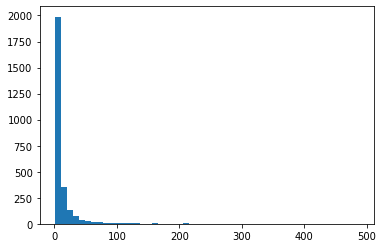

In [330]:
plt.hist(new_df_select['dislike_perc_of_likes'], bins=50);

(array([1349.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1373.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

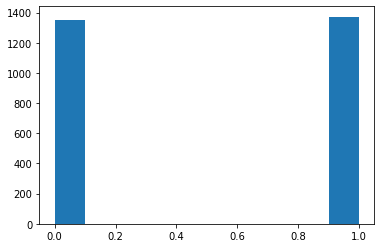

In [334]:
plt.hist(new_df_select['success'])

In [366]:
with open('ted_video_stats_2722.pkl', 'wb') as picklefile:
    pickle.dump(new_df_select, picklefile)